In [30]:
import pandas as pd
import numpy as np
import matplotlib
from matplotlib import pylab as plt
from scipy.stats import linregress

df = pd.read_csv('../data/News_pro.csv')

In [2]:
# max(df['Facebook_pro'].values)

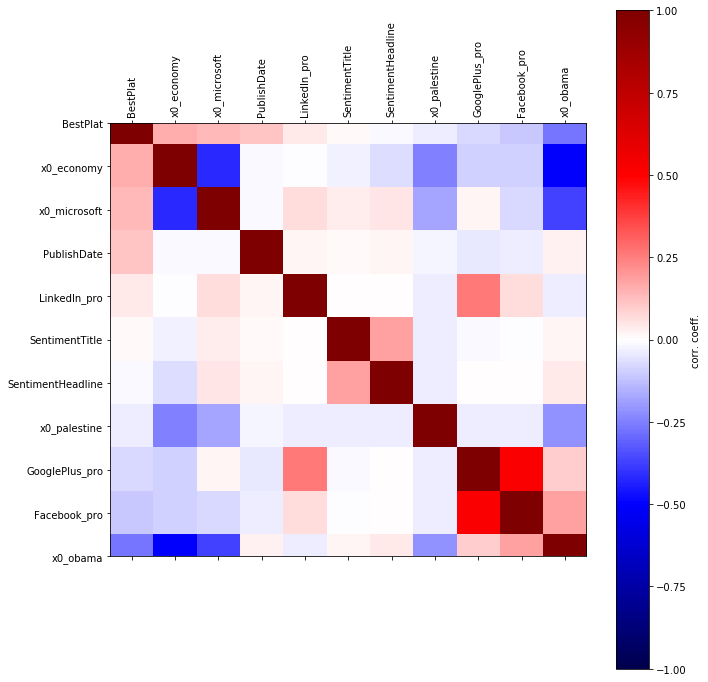

In [84]:
df_preprocessed = df.drop(columns=['IDLink','Topic','Facebook','GooglePlus','LinkedIn'])
corrmat = df_preprocessed.corr()

all_cols = corrmat.sort_values('BestPlat',ascending=False)['BestPlat'].index 
cols = all_cols # negatively correlated features

cm = corrmat.loc[cols,cols]

plt.figure(figsize=(10,10))
plt.matshow(cm,vmin=-1,vmax=1,cmap='seismic',fignum=0)
plt.colorbar(label='corr. coeff.')
plt.xticks(np.arange(cm.shape[0]),list(cols),rotation=90)
plt.yticks(np.arange(cm.shape[0]),list(cols))
plt.tight_layout()
# plt.savefig('figures/corr_coeff_dummies.png',dpi=300)
plt.show()

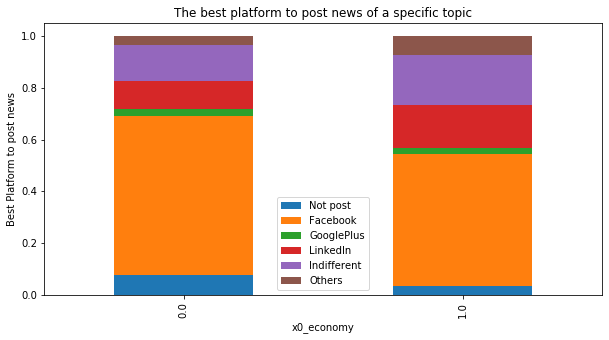

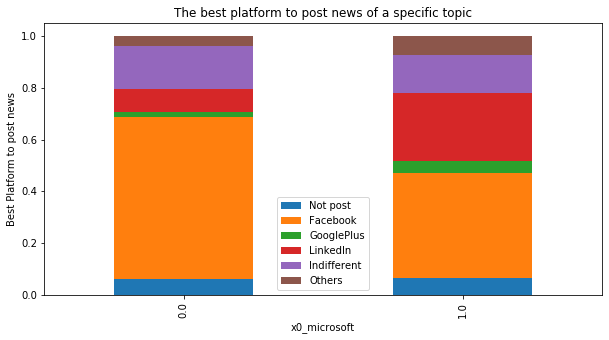

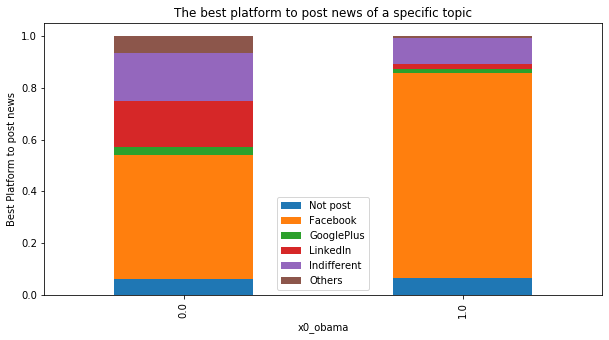

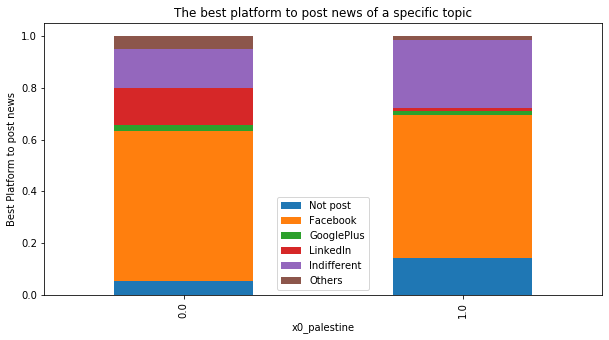

In [14]:
label = 'BestPlat'
topic = ['x0_economy','x0_microsoft','x0_obama','x0_palestine']
for x in topic:
    count_matrix = df.groupby([x, label]).size().unstack()
    count_matrix_norm = count_matrix.div(count_matrix.sum(axis=1),axis=0)
    count_matrix_norm.plot(kind='bar', stacked=True, figsize=(10,5))
    plt.xlabel(x)
    plt.ylabel('Best Platform to post news')
    plt.title("The best platform to post news of a specific topic")
    plt.legend(['Not post','Facebook','GooglePlus','LinkedIn','Indifferent','Others'],loc='best')
    plt.show()

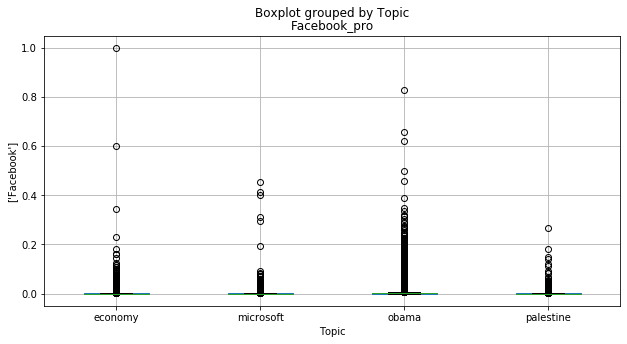

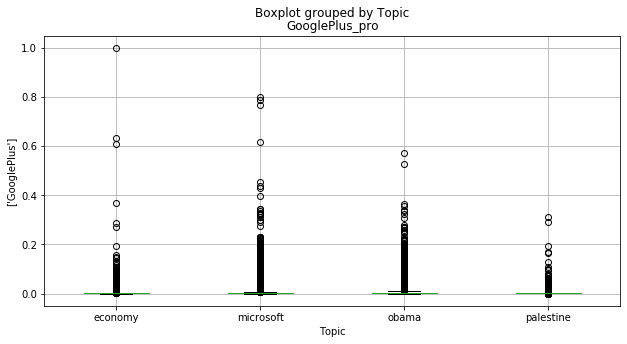

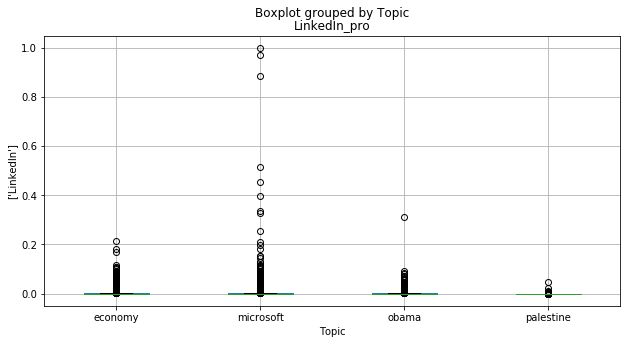

In [38]:
label = 'Topic'
df[['Facebook_pro',label]].boxplot(by=label,figsize=(10,5))
plt.xlabel(label)
plt.ylabel('Facebook')
plt.show()

label = 'Topic'
df[['GooglePlus_pro',label]].boxplot(by=label,figsize=(10,5))
plt.xlabel(label)
plt.ylabel('GooglePlus')
plt.show()

label = 'Topic'
df[['LinkedIn_pro',label]].boxplot(by=label,figsize=(10,5))
plt.xlabel(label)
plt.ylabel('LinkedIn')
plt.show()

'61.798514501296864'

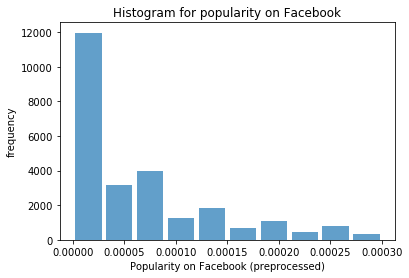

In [77]:
h = []
x = df['Facebook_pro']
y = df['x0_economy']
n = 0
m = 0
for i in range(len(y)):
    if y[i] == 1:
        h.append(x[i])
        n += 1
        if 0 < x[i] < 0.0003:
            m += 1
plt.hist(h,range=(0,0.0003), alpha=0.7, rwidth=0.85)
plt.xlabel('Popularity on Facebook (preprocessed)')
plt.ylabel('frequency')
plt.title("Histogram for popularity on Facebook")
str(m/n*100)

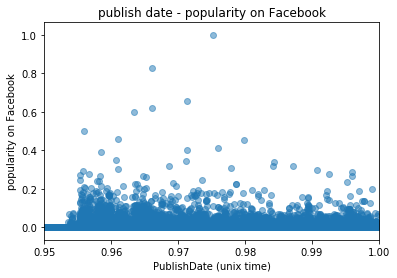

In [18]:
plt.scatter(x = df['PublishDate'], y = df['Facebook_pro'], alpha=0.5)
plt.title('publish date - popularity on Facebook')
plt.xlabel('PublishDate (unix time)')
plt.ylabel('popularity on Facebook')
plt.xlim(0.95, 1.0)
plt.show()

Text(0.5, 1.0, 'Simple linear regression between publish time and popularity')

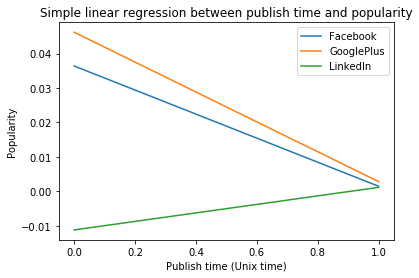

In [55]:
X = df['PublishDate']
y = df['Facebook_pro']
slope, intercept, r_value, p_value, std_err = linregress(X,y)
plt.plot(X, slope*X+intercept)

X = df['PublishDate']
y = df['GooglePlus_pro']
slope, intercept, r_value, p_value, std_err = linregress(X,y)
plt.plot(X, slope*X+intercept)

X = df['PublishDate']
y = df['LinkedIn_pro']
slope, intercept, r_value, p_value, std_err = linregress(X,y)
plt.plot(X, slope*X+intercept)

plt.legend(['Facebook','GooglePlus','LinkedIn'],loc="best" )
plt.xlabel('Publish time (Unix time)')
plt.ylabel('Popularity')
plt.title("Simple linear regression between publish time and popularity")